# YOLO 토마토 질병 분류 모델학습

## 환경설정

In [ ]:
# 1단계: 환경 설정
print("🚀 YOLOv8 토마토 질병 분류 - 학습 노트북")
print("=" * 50)

# 필요한 패키지 설치
print("📦 필요한 패키지 설치 중...")
!pip install ultralytics -q
print("✅ ultralytics 설치 완료")

# 라이브러리 import
import torch
import os
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import drive

# 구글 드라이브 마운트
print("\n📁 구글 드라이브 마운트 중...")
drive.mount('/content/drive', force_remount=True)
print("✅ 구글 드라이브 마운트 완료")

# GPU 및 시스템 정보 확인
print(f"\n💻 시스템 정보:")
print(f"CUDA 사용 가능: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU 메모리: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")


🚀 YOLOv8 토마토 질병 분류 - 학습 노트북
📦 필요한 패키지 설치 중...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.9 MB/s eta 0:00:00

## 데이터셋 및 YAML 파일 확인

In [ ]:
# 2단계: 데이터셋 및 YAML 파일 확인
print(f"\n=== 데이터셋 확인 ===")

dataset_path = "/content/drive/MyDrive/dataset_6class_complete"
yaml_path = "/content/drive/MyDrive/data_6class.yaml"

print(f"데이터셋 경로: {dataset_path}")
print(f"YAML 경로: {yaml_path}")

# 데이터셋 구조 확인
if os.path.exists(dataset_path):
    print(f"✅ 데이터셋 존재 확인")
    for part in ['newpart_01', 'newpart_02', 'newpart_03']:
        part_dir = f"{dataset_path}/{part}"
        if os.path.exists(part_dir):
            img_count = len([f for f in os.listdir(part_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])
            txt_count = len([f for f in os.listdir(part_dir) if f.endswith('.txt')])
            role = "Train" if part != 'newpart_03' else "Val"
            print(f"  {part}: 이미지 {img_count}개, 라벨 {txt_count}개 ({role})")
else:
    print(f"❌ 데이터셋이 없습니다: {dataset_path}")
    print("⚠️ 학습을 진행할 수 없습니다. 데이터셋을 확인해주세요.")

# YAML 파일 확인
if os.path.exists(yaml_path):
    print(f"✅ YAML 파일 존재 확인")
    with open(yaml_path, 'r', encoding='utf-8') as f:
        yaml_content = f.read()
        print(f"YAML 내용:\n{yaml_content}")
else:
    print(f"❌ YAML 파일이 없습니다: {yaml_path}")
    print("⚠️ 학습을 진행할 수 없습니다. YAML 파일을 확인해주세요.")



=== 데이터셋 확인 ===
데이터셋 경로: /content/drive/MyDrive/dataset_6class_complete
YAML 경로: /content/drive/MyDrive/data_6class.yaml
✅ 데이터셋 존재 확인
  newpart_01: 이미지 600개, 라벨 600개 (Train)
  newpart_02: 이미지 600개, 라벨 600개 (Train)
  newpart_03: 이미지 300개, 라벨 300개 (Val)
✅ YAML 파일 존재 확인
YAML 내용:
train:
  - /content/drive/MyDrive/dataset_6class_complete/newpart_01
  - /content/drive/MyDrive/dataset_6class_complete/newpart_02

val:
  - /content/drive/MyDrive/dataset_6class_complete/newpart_03

nc: 6
names: 
  - 'Normal'
  - 'Gray mold'
  - 'Powdery mildew'
  - 'Nitrogen deficiency'
  - 'Phosphorus deficiency'
  - 'Potassium deficiency'


## 학습 실행 여부 확인

In [ ]:
# 3단계: 학습 실행 여부 확인 및 안전장치 (개선된 버전)
print(f"\n=== 기존 학습 결과 확인 ===")

def check_existing_training(run_name):
    """
    지정된 이름(run_name)의 학습 결과가 있는지 확인합니다.
    - Args: run_name (str): 확인할 학습 실행 이름 (예: 'tomato_6class_v1')
    - Returns: bool: 학습 결과가 존재하면 True, 없으면 False
    """
    results_dir = f"/content/drive/MyDrive/yolo_training_results/{run_name}"
    weights_dir = f"{results_dir}/weights"

    if os.path.exists(weights_dir):
        # weights 폴더 안에 .pt 파일이 있는지 확인
        weights = [f for f in os.listdir(weights_dir) if f.endswith('.pt')]
        if weights:
            print(f"✅ '{run_name}'에 대한 기존 학습 결과가 발견되었습니다!")
            print(f"📂 위치: {weights_dir}")
            return True # 학습 결과가 존재함

    print(f"ℹ️ '{run_name}'에 대한 기존 학습 결과가 없습니다. 새로 학습을 시작할 수 있습니다.")
    return False # 학습 결과가 없음

# --- 실제 사용 ---
# v1 모델의 존재 여부를 확인하여 'existing_training' 변수에 저장합니다.
# 이 변수는 4단계의 start_training 함수에서 안전장치로 사용됩니다.
run_name_to_check = 'tomato_6class_v1'
existing_training = check_existing_training(run_name_to_check)


=== 기존 학습 결과 확인 ===
✅ 'tomato_6class_v1'에 대한 기존 학습 결과가 발견되었습니다!
📂 위치: /content/drive/MyDrive/yolo_training_results/tomato_6class_v1/weights


## 기존 학습모델 불러오기 및 저화질 이미지 대비 모델 학습

In [ ]:
# 4단계: YOLOv8 학습 시작 (최종 버전)
def start_training(existing_training, force_retrain=False):
    """
    YOLO 모델 학습을 실행합니다. (데이터 증강 및 Fine-tuning 적용)
    - Args:
        existing_training (bool): 기존 학습 결과 존재 여부
        force_retrain (bool): 기존 결과가 있어도 강제로 재학습할지 여부
    """
    # 안전장치: 기존 학습이 있고, 강제 재학습 옵션이 꺼져있으면 함수 종료
    if existing_training and not force_retrain:
        print(f"\n🛑 기존 학습 결과가 있어 학습을 건너뜁니다.")
        print(f"💡 새로 학습하려면 start_training(existing_training, force_retrain=True)를 실행하세요.")
        return None

    print(f"\n=== YOLOv8 학습 시작 ===")

    # 데이터셋 및 YAML 파일 존재 여부 확인
    if not os.path.exists(dataset_path) or not os.path.exists(yaml_path):
        print(f"❌ 데이터셋 또는 YAML 파일이 없습니다. 학습을 중단합니다.")
        return None

    # GPU 메모리 정리
    torch.cuda.empty_cache()

    # 이전 best.pt 모델 로드 (Fine-tuning)
    previous_best_model_path = '/content/drive/MyDrive/yolo_training_results/tomato_6class_v1/weights/best.pt'
    if os.path.exists(previous_best_model_path):
        model = YOLO(previous_best_model_path)
        print(f"✅ 이전 학습 모델 로드 완료: {previous_best_model_path}")
    else:
        print(f"⚠️ 이전 모델을 찾을 수 없어 yolov8s.pt로 새로 학습합니다.")
        model = YOLO('yolov8s.pt')

    # 학습 시작
    print(f"\n🚀 데이터 증강을 적용한 v2 모델 학습 시작!")
    print(f"📊 학습 진행 상황은 실시간으로 표시됩니다.")

    results = model.train(
        # 데이터 설정
        data=yaml_path,
        # 학습 파라미터
        epochs=50,                # 50 에포크
        imgsz=640,                # 이미지 크기 조정
        batch=16,                 # 배치 크기
        device=0,                 # GPU 사용

        # 새로운 결과 폴더 이름 (구글 드라이브에 저장)
        project='/content/drive/MyDrive/yolo_training_results',
        name='tomato_6class_v2_augmented',

        # 데이터 증강 맞춤 레시피
        hsv_s=0.6,                # 채도를 60%까지 낮춰 "색 바랜느낌" 재현
        hsv_v=0.5,                # 밝기를 50%까지 바꿔 "뿌옇고 어두운 느낌" 재현
        degrees=15,               # 카메라가 15도까지 기울어지는 상황 재현
        translate=0.1,            # 상하좌우로 10%씩 미세하게 움직이는 효과
        scale=0.5,                # 줌인/줌아웃 효과로 거리 변화를 줌
        # jpeg=50,                # JPEG 품질을 50%로 낮춤
        mosaic=0.5,               # 여러 이미지를 모자이크처럼 합쳐, 다양한 배경과 작은 객체 학습
        mixup=0.3,                # 두 이미지를 부드럽게 섞어, 예상치 못한 이미지에 대한 대응력 향상

        # 나머지 파라미터는 기존 prototype과 동일
        optimizer='AdamW',        # 옵티마이저, 기존 yolo
        lr0=0.01,                 # 학습률: 손실 함수에서 최소값을 향해 이동하는 동안 각 반복에서의 스템크기 결정
        warmup_epochs=3,          # 웜업 에포크

        # 검증 관련(validation)
        conf=0.001,               # validation confidence threshold
        iou=0.6,                  # loU threshold

        # 손실 함수 가중치
        box=7.5,                  # 박스 손실 가중치
        cls=0.5,                  # 분류 손실 가중치
        dfl=1.5,                  # DFL 손실 가중치

        # 저장 및 로그 설정
        save=True,                # 모델 저장
        save_period=10,           # 10 epoch마다 저장
        plots=True,               # 그래프 저장
        val=True,                 # 검증 수행

        # 조기 종료 및 기타
        patience=20,              # 조기 종료 기준
        exist_ok=True,            # 기존 폴더 덮어쓰기 허용
        verbose=True              # 상세 로그
    )

    print(f"\n🎉 v2 모델 학습 완료!")
    return results

# --- 4단계 함수 실행 ---
# 3단계에서 얻은 existing_training 변수를 함수에 전달합니다.
# 새로운 학습을 시작하기 위해 force_retrain=True로 설정합니다.
training_results = start_training(existing_training, force_retrain=True)


=== YOLOv8 학습 시작 ===
✅ 이전 학습 모델 로드 완료: /content/drive/MyDrive/yolo_training_results/tomato_6class_v1/weights/best.pt

🚀 데이터 증강을 적용한 v2 모델 학습 시작!
📊 학습 진행 상황은 실시간으로 표시됩니다.
Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.001, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/data_6class.yaml, degrees=15, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.6, hsv_v=0.5, imgsz=640, int8=False, iou=0.6, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.3, mode=train, model=/content/drive/MyDrive/yolo_training_re


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

 22        [15, 18, 21]  1   2118370  ultralytics.nn.modules.head.Detect           [6, [128, 256, 512]]          
Model summary: 129 layers, 11,137,922 parameters, 11,137,906 gradients, 28.7 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 8.2±3.8 MB/s, size: 5428.2 KB)


train: Scanning /content/drive/MyDrive/dataset_6class_complete/newpart_01.cache... 1200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:00<?, ?it/s]

train: /content/drive/MyDrive/dataset_6class_complete/newpart_01/class0_000.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/dataset_6class_complete/newpart_01/class0_001.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/dataset_6class_complete/newpart_01/class0_002.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/dataset_6class_complete/newpart_01/class0_003.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/dataset_6class_complete/newpart_01/class0_004.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/dataset_6class_complete/newpart_01/class0_005.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/dataset_6class_complete/newpart_01/class0_006.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/dataset_6class_complete/newpart_01/class0_007.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/dataset_6class_complete/newpart_01/class0_008.jpg: corrupt JPEG re

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.3 ms, read: 5.6±4.5 MB/s, size: 3826.7 KB)


val: Scanning /content/drive/MyDrive/dataset_6class_complete/newpart_03.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]

val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_000.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_001.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_002.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_003.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_004.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_005.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_006.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_007.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_008.jpg: corrupt JPEG restored and saved
v

Plotting labels to /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.52G      1.447      1.411      1.795         53        640: 100%|██████████| 75/75 [15:33<00:00, 12.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:35<00:00,  3.54s/it]

                   all        300        300      0.622      0.799      0.827      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.31G      1.355      1.416      1.719         47        640: 100%|██████████| 75/75 [02:55<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.93s/it]

                   all        300        300      0.641      0.671      0.709      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.31G      1.319      1.404      1.679         36        640: 100%|██████████| 75/75 [02:59<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.69s/it]


                   all        300        300      0.669      0.701      0.774      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.31G      1.324      1.413      1.681         28        640: 100%|██████████| 75/75 [02:51<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.74s/it]

                   all        300        300      0.702      0.657      0.779      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.35G      1.314       1.41      1.691         33        640: 100%|██████████| 75/75 [02:53<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:25<00:00,  2.57s/it]


                   all        300        300      0.844      0.831      0.889      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.35G      1.319      1.368      1.667         46        640: 100%|██████████| 75/75 [02:46<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.97s/it]


                   all        300        300      0.843      0.877      0.903      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.35G      1.316      1.424       1.68         37        640: 100%|██████████| 75/75 [02:55<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.91s/it]

                   all        300        300      0.819       0.74      0.846       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.35G      1.275      1.314      1.642         31        640: 100%|██████████| 75/75 [02:55<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.11s/it]

                   all        300        300      0.769      0.824      0.867      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.35G      1.262      1.314      1.614         43        640: 100%|██████████| 75/75 [02:57<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.87s/it]

                   all        300        300      0.822       0.82      0.863      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.35G      1.251      1.275      1.614         34        640: 100%|██████████| 75/75 [02:53<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.97s/it]

                   all        300        300      0.804      0.795      0.858      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.35G      1.241      1.269      1.615         35        640: 100%|██████████| 75/75 [03:01<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.16s/it]

                   all        300        300      0.771      0.833       0.89       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.35G      1.245      1.313      1.629         52        640: 100%|██████████| 75/75 [03:04<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:30<00:00,  3.02s/it]

                   all        300        300      0.832       0.88      0.909      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.35G      1.195      1.186      1.546         39        640: 100%|██████████| 75/75 [03:06<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.83s/it]

                   all        300        300      0.841       0.82      0.902      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.35G      1.197      1.219      1.566         39        640: 100%|██████████| 75/75 [03:12<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:30<00:00,  3.00s/it]

                   all        300        300      0.821      0.805      0.887      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.35G      1.176      1.147      1.542         36        640: 100%|██████████| 75/75 [03:12<00:00,  2.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.91s/it]

                   all        300        300      0.646      0.801      0.828      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.35G       1.17      1.152      1.533         36        640: 100%|██████████| 75/75 [02:55<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:33<00:00,  3.32s/it]

                   all        300        300      0.772       0.83      0.908       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.35G      1.139      1.104      1.523         45        640: 100%|██████████| 75/75 [02:57<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:30<00:00,  3.05s/it]

                   all        300        300      0.905      0.875      0.941      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.35G      1.145      1.091      1.533         40        640: 100%|██████████| 75/75 [03:03<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.75s/it]

                   all        300        300      0.844      0.847      0.939      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.35G      1.168      1.106      1.544         32        640: 100%|██████████| 75/75 [02:59<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.87s/it]

                   all        300        300      0.636      0.581      0.601       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.35G      1.142       1.06      1.533         42        640: 100%|██████████| 75/75 [03:02<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.92s/it]

                   all        300        300       0.87      0.864       0.91      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.35G      1.134      1.064      1.498         54        640: 100%|██████████| 75/75 [03:07<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:32<00:00,  3.26s/it]

                   all        300        300      0.909      0.917      0.952      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.35G      1.115      1.066      1.501         31        640: 100%|██████████| 75/75 [03:02<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:30<00:00,  3.01s/it]

                   all        300        300      0.885      0.904      0.936       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.35G      1.083      1.011      1.465         31        640: 100%|██████████| 75/75 [03:00<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.93s/it]

                   all        300        300      0.886      0.878      0.946      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.35G      1.097      1.039      1.493         40        640: 100%|██████████| 75/75 [03:00<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.85s/it]

                   all        300        300      0.744      0.792      0.836      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.35G      1.074     0.9982      1.476         29        640: 100%|██████████| 75/75 [03:04<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:30<00:00,  3.10s/it]


                   all        300        300      0.916      0.906      0.956      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.35G      1.068     0.9807      1.468         33        640: 100%|██████████| 75/75 [02:58<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.91s/it]

                   all        300        300      0.885       0.87      0.933      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.38G      1.077     0.9866      1.466         36        640: 100%|██████████| 75/75 [03:01<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  3.00s/it]


                   all        300        300      0.905      0.935       0.96      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.42G      1.057     0.9832      1.451         38        640: 100%|██████████| 75/75 [03:06<00:00,  2.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.77s/it]

                   all        300        300      0.918      0.919      0.957      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.46G      1.058      0.956      1.454         40        640: 100%|██████████| 75/75 [02:57<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:32<00:00,  3.21s/it]


                   all        300        300      0.913       0.89      0.958      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.49G      1.041      0.943      1.439         41        640: 100%|██████████| 75/75 [02:59<00:00,  2.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.70s/it]

                   all        300        300      0.919      0.922      0.965      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.53G      1.066     0.9626      1.457         46        640: 100%|██████████| 75/75 [03:00<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.94s/it]


                   all        300        300      0.858      0.907      0.936      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.57G       1.03     0.9118      1.437         41        640: 100%|██████████| 75/75 [03:00<00:00,  2.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.13s/it]

                   all        300        300      0.868      0.932      0.955      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.6G       1.03     0.9287      1.436         34        640: 100%|██████████| 75/75 [02:57<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.85s/it]

                   all        300        300      0.951      0.931      0.966      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.64G      1.009     0.9132      1.423         40        640: 100%|██████████| 75/75 [03:01<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.86s/it]

                   all        300        300      0.907      0.926      0.963      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.64G     0.9836      0.885        1.4         35        640: 100%|██████████| 75/75 [03:03<00:00,  2.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.73s/it]

                   all        300        300      0.915       0.92      0.967      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.64G     0.9874     0.8572      1.406         38        640: 100%|██████████| 75/75 [02:55<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.96s/it]

                   all        300        300      0.944      0.911      0.971      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.64G     0.9794     0.8318      1.386         38        640: 100%|██████████| 75/75 [02:54<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.99s/it]

                   all        300        300      0.948      0.938      0.972      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.64G     0.9837     0.8544      1.399         39        640: 100%|██████████| 75/75 [02:55<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.10s/it]

                   all        300        300      0.926      0.925      0.971      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.64G     0.9914     0.8554      1.414         37        640: 100%|██████████| 75/75 [03:04<00:00,  2.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.80s/it]

                   all        300        300      0.877      0.922      0.949      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.64G     0.9807     0.8285      1.392         35        640: 100%|██████████| 75/75 [03:03<00:00,  2.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.98s/it]

                   all        300        300      0.934      0.933      0.967      0.806


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.64G     0.6856     0.4707      1.228         16        640: 100%|██████████| 75/75 [02:41<00:00,  2.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.70s/it]

                   all        300        300      0.945      0.904      0.949      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.64G     0.6665     0.4307      1.219         16        640: 100%|██████████| 75/75 [02:27<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.85s/it]


                   all        300        300      0.864      0.919      0.926      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.64G     0.6575      0.417      1.207         16        640: 100%|██████████| 75/75 [02:29<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.71s/it]

                   all        300        300      0.925       0.94      0.963      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.64G     0.6432     0.4019      1.195         16        640: 100%|██████████| 75/75 [02:30<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:25<00:00,  2.55s/it]

                   all        300        300      0.931      0.953      0.973      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.64G     0.6411     0.3957      1.201         16        640: 100%|██████████| 75/75 [02:34<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.65s/it]

                   all        300        300      0.949      0.966      0.974      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.64G      0.609     0.3847      1.164         16        640: 100%|██████████| 75/75 [02:32<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.63s/it]

                   all        300        300      0.932      0.962      0.976      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.64G     0.6071     0.3717      1.164         16        640: 100%|██████████| 75/75 [02:31<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.63s/it]

                   all        300        300      0.941      0.954      0.971      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.64G     0.5911     0.3618      1.145         16        640: 100%|██████████| 75/75 [02:28<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.11s/it]

                   all        300        300      0.942      0.942      0.974      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.64G     0.5795     0.3541      1.147         16        640: 100%|██████████| 75/75 [02:31<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.85s/it]

                   all        300        300      0.947      0.942      0.972      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.64G     0.6065     0.3514      1.158         16        640: 100%|██████████| 75/75 [02:30<00:00,  2.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.84s/it]

                   all        300        300      0.951      0.937      0.974      0.847



50 epochs completed in 3.055 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented/weights/best.pt...
Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.41s/it]


                   all        300        300      0.949      0.966      0.974      0.849
                Normal         50         50      0.907        0.9      0.946      0.837
             Gray mold         50         50      0.939       0.98      0.954      0.825
        Powdery mildew         50         50      0.991          1      0.995      0.889
   Nitrogen deficiency         50         50      0.977          1      0.995      0.846
 Phosphorus deficiency         50         50      0.995       0.98      0.994      0.879
  Potassium deficiency         50         50      0.887      0.938      0.963      0.816
Speed: 0.3ms preprocess, 4.1ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented

🎉 v2 모델 학습 완료!


## 학습 결과 확인 함수

In [ ]:
# 5단계: 학습 결과 확인 함수 (최종 수정 버전)
def check_training_results(run_name, yaml_path): # yaml_path를 입력으로 받도록 수정
    """지정된 이름(run_name)의 학습 결과를 확인하고 최종 성능을 검증합니다."""
    print(f"\n=== '{run_name}' 학습 결과 확인 ===")

    results_dir = f'/content/drive/MyDrive/yolo_training_results/{run_name}'
    weights_dir = f"{results_dir}/weights"

    if not os.path.exists(weights_dir):
        print(f"❌ '{run_name}'에 대한 학습 결과를 찾을 수 없습니다.")
        print(f"💡 학습을 먼저 실행하거나, run_name을 확인해주세요.")
        return

    weights = [f for f in os.listdir(weights_dir) if f.endswith('.pt')]
    print(f"✅ 저장된 가중치: {weights}")

    if 'best.pt' in weights:
        best_model_path = f"{weights_dir}/best.pt"
        print(f"🏆 최고 성능 모델 로딩: {best_model_path}")

        best_model = YOLO(best_model_path)

        print("\n🚀 최종 성능 검증(Validation) 시작...")
        # 함수 안으로 전달받은 yaml_path를 사용
        val_results = best_model.val(data=yaml_path, imgsz=640, device=0)

        print(f"\n📊 '{run_name}' 모델 최종 성능:")
        print(f"  - mAP@50 (정확도 위주): {val_results.box.map50:.4f}")
        print(f"  - mAP@50-95 (종합 성능): {val_results.box.map:.4f}")

        class_names = best_model.names
        per_class_maps = val_results.box.maps

        if per_class_maps is not None and len(per_class_maps) == len(class_names):
            print(f"\n📈 클래스별 mAP@50-95:")
            for i, name in class_names.items():
                print(f"  - {name}: {per_class_maps[i]:.4f}")

    print(f"\n📂 결과 저장 위치: {results_dir}")

# --- 함수 사용 예시 ---
# 함수를 호출할 때, 이전에 정의한 yaml_path 변수를 함께 전달합니다.
check_training_results('tomato_6class_v2_augmented', yaml_path)


=== 'tomato_6class_v2_augmented' 학습 결과 확인 ===
✅ 저장된 가중치: ['epoch0.pt', 'epoch10.pt', 'epoch20.pt', 'epoch30.pt', 'epoch40.pt', 'best.pt', 'last.pt']
🏆 최고 성능 모델 로딩: /content/drive/MyDrive/yolo_training_results/tomato_6class_v2_augmented/weights/best.pt

🚀 최종 성능 검증(Validation) 시작...
Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 7.1±3.2 MB/s, size: 4223.6 KB)


val: Scanning /content/drive/MyDrive/dataset_6class_complete/newpart_03.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]

val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_000.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_001.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_002.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_003.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_004.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_005.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_006.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_007.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/dataset_6class_complete/newpart_03/class0_008.jpg: corrupt JPEG restored and saved
v


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:55<00:00,  2.95s/it]


                   all        300        300      0.949      0.966      0.974      0.846
                Normal         50         50       0.91        0.9      0.945      0.838
             Gray mold         50         50      0.935       0.98      0.953       0.82
        Powdery mildew         50         50      0.993          1      0.995      0.888
   Nitrogen deficiency         50         50      0.973          1      0.995      0.845
 Phosphorus deficiency         50         50      0.997       0.98      0.993      0.878
  Potassium deficiency         50         50      0.886      0.937       0.96      0.806
Speed: 3.0ms preprocess, 8.4ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/val

📊 'tomato_6class_v2_augmented' 모델 최종 성능:
  - mAP@50 (정확도 위주): 0.9736
  - mAP@50-95 (종합 성능): 0.8457

📈 클래스별 mAP@50-95:
  - Normal: 0.8379
  - Gray mold: 0.8197
  - Powdery mildew: 0.8877
  - Nitrogen deficiency: 0.8448
  - Phosphorus deficiency: 0.8776
  - Potas

## 학습 결과 상세 분석


📊 'tomato_6class_v2_augmented' 학습 결과 상세 분석 시작!
✅ 총 50개 에포크의 학습 기록을 발견했습니다.
✅ 손실(Loss) 그래프 생성 완료


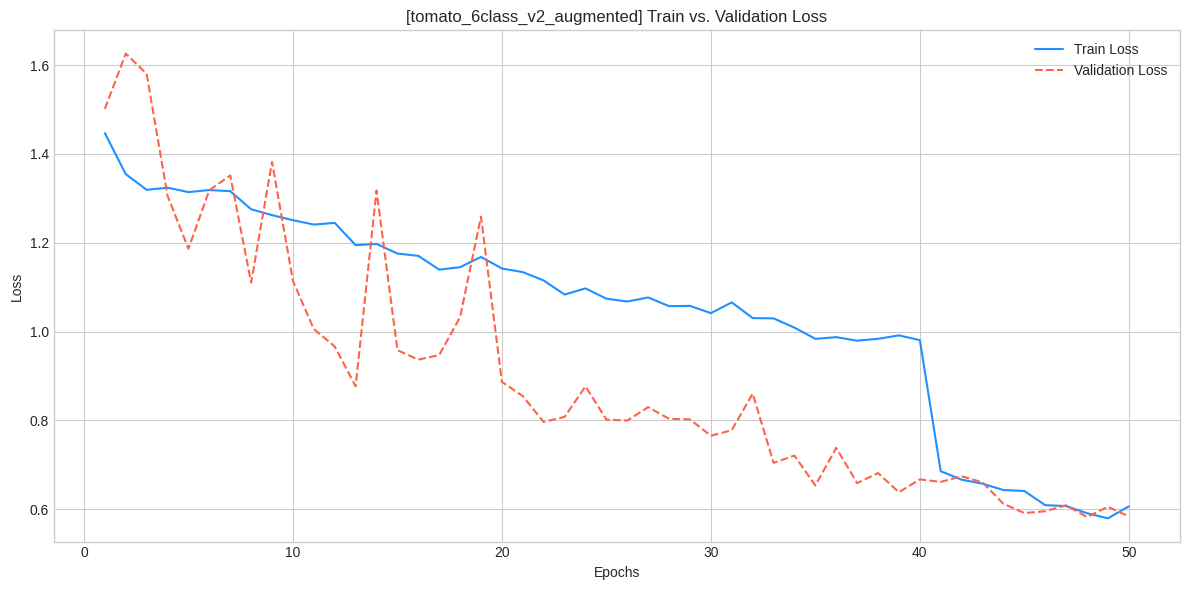

✅ 성능(mAP) 그래프 생성 완료


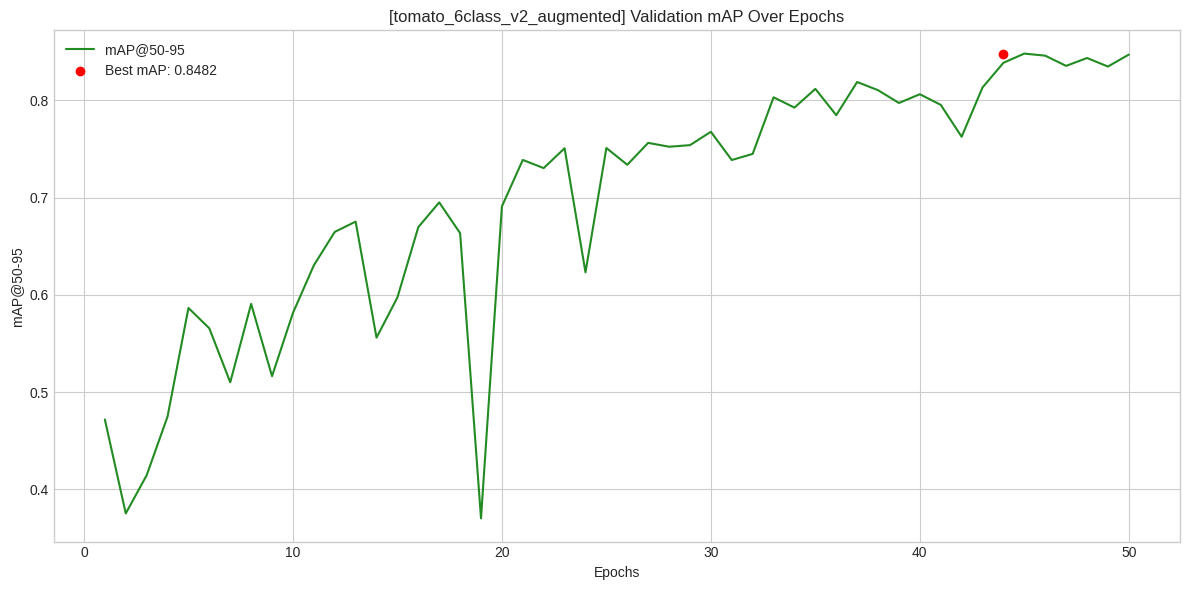

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 6단계: 학습 결과 상세 분석 (최종 개선 버전)
def analyze_training_results(run_name):
    """지정된 이름(run_name)의 학습 결과를 상세 분석하고 그래프로 시각화합니다."""
    print(f"\n📊 '{run_name}' 학습 결과 상세 분석 시작!")

    results_dir = f'/content/drive/MyDrive/yolo_training_results/{run_name}'
    results_csv_path = f"{results_dir}/results.csv"

    if not os.path.exists(results_csv_path):
        print(f"❌ results.csv 파일이 없습니다: {results_csv_path}")
        return None

    # CSV 읽기 및 기본 정보 출력
    df = pd.read_csv(results_csv_path)
    # 공백 제거
    df.columns = df.columns.str.strip()

    print(f"✅ 총 {len(df)}개 에포크의 학습 기록을 발견했습니다.")

    # --- 1. 손실(Loss) 그래프 시각화 ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

    # 훈련 손실과 검증 손실 컬럼 찾기
    train_loss_col = 'train/box_loss' # 또는 'train/loss' 등, results.csv에 맞게 조정
    val_loss_col = 'val/box_loss'     # 또는 'val/loss' 등

    if train_loss_col in df.columns and val_loss_col in df.columns:
        ax1.plot(df['epoch'], df[train_loss_col], label='Train Loss', color='dodgerblue')
        ax1.plot(df['epoch'], df[val_loss_col], label='Validation Loss', color='tomato', linestyle='--')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Loss')
        ax1.set_title(f'[{run_name}] Train vs. Validation Loss')
        ax1.legend()
        print("✅ 손실(Loss) 그래프 생성 완료")

    plt.tight_layout()
    plt.show()

    # --- 2. 성능(mAP) 그래프 시각화 ---
    map_col = 'metrics/mAP50-95(B)' # 종합 성능 지표
    if map_col in df.columns:
        fig, ax2 = plt.subplots(1, 1, figsize=(12, 6))
        ax2.plot(df['epoch'], df[map_col], label='mAP@50-95', color='forestgreen')

        # 최고 성능 지점 표시
        best_map_epoch = df[map_col].idxmax()
        best_map_value = df[map_col].max()
        ax2.scatter(best_map_epoch, best_map_value, color='red', zorder=5, label=f'Best mAP: {best_map_value:.4f}')

        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('mAP@50-95')
        ax2.set_title(f'[{run_name}] Validation mAP Over Epochs')
        ax2.legend()
        print("✅ 성능(mAP) 그래프 생성 완료")

        plt.tight_layout()
        plt.show()

    else:
        print(f"⚠️ mAP 컬럼('{map_col}')을 찾을 수 없어 그래프를 생성할 수 없습니다.")

    return df

# --- 함수 사용 예시 ---
# 새로 학습한 v2 모델의 결과를 분석
results_df = analyze_training_results('tomato_6class_v2_augmented')

## 학습 곡선 시각화


📈 'tomato_6class_v2_augmented' 학습 곡선 시각화 시작!


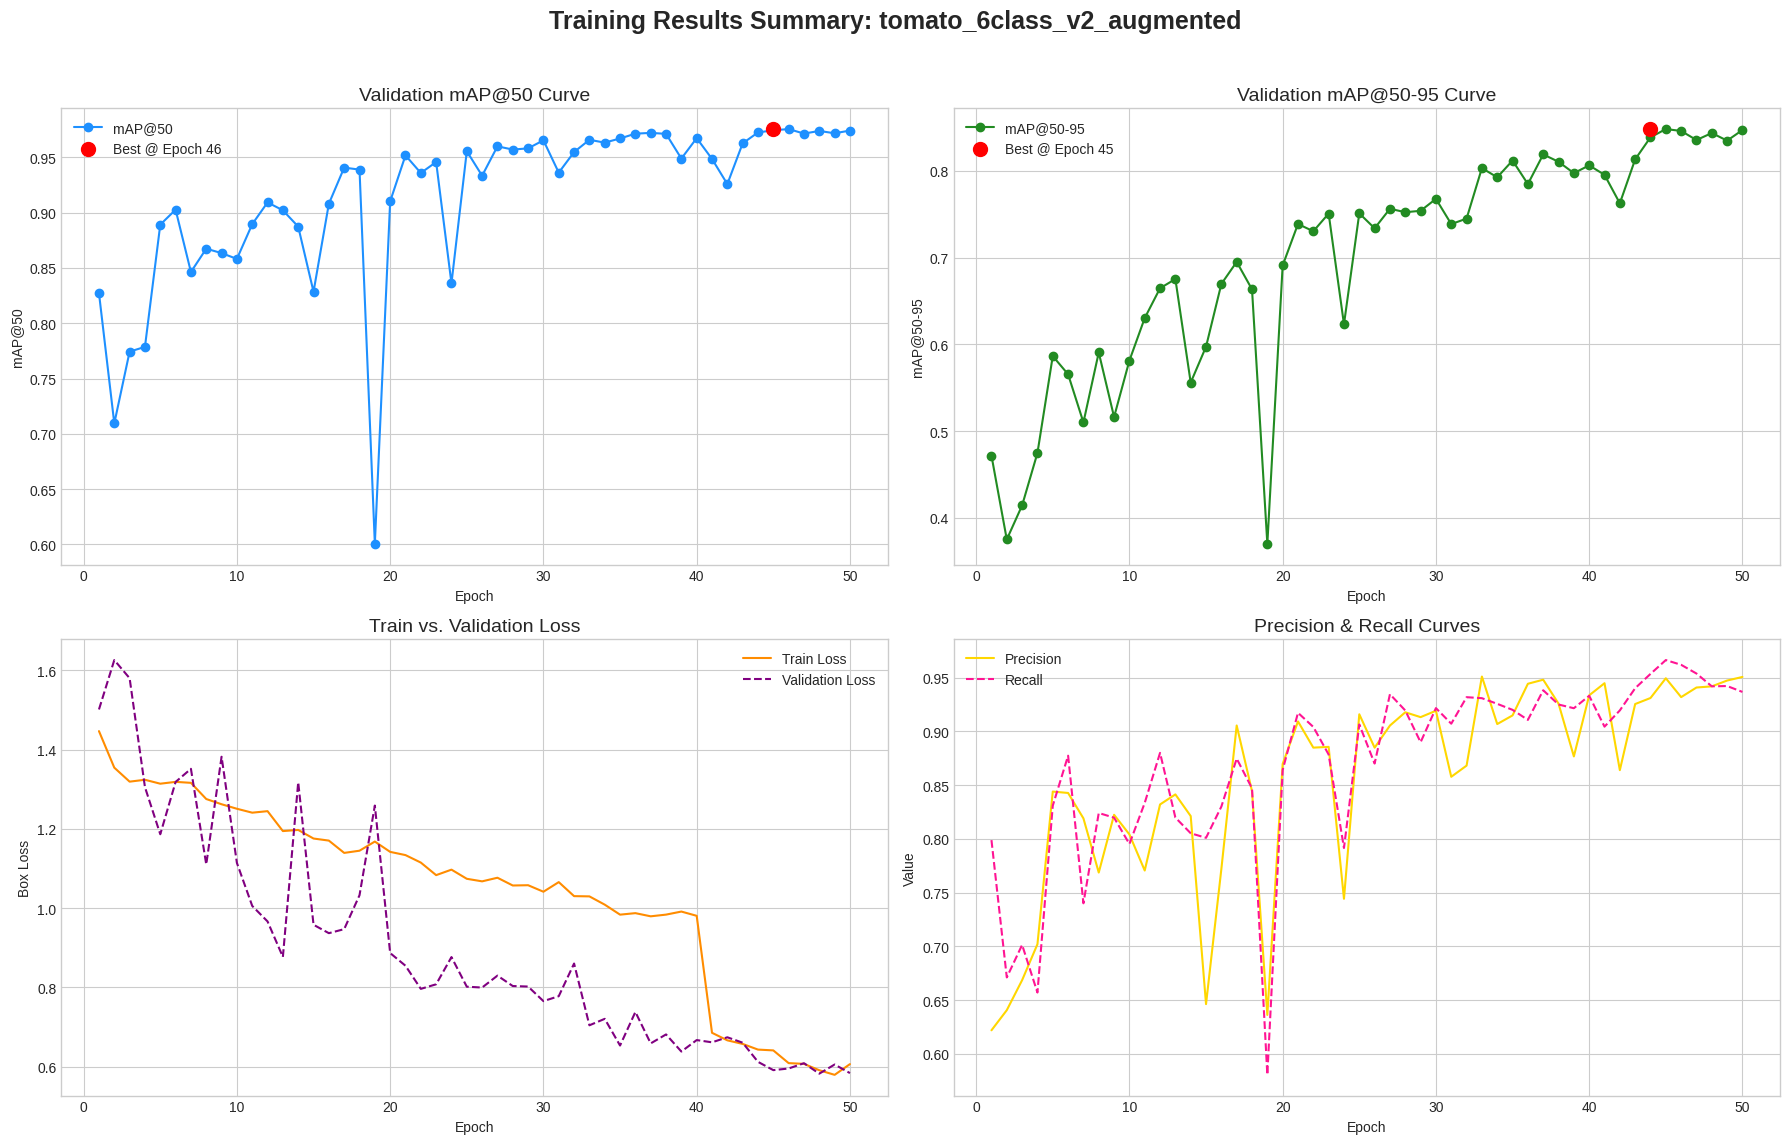

✅ 학습 곡선 저장 완료: /content/drive/MyDrive/tomato_6class_v2_augmented_training_curves.png


In [ ]:
# 7단계: 학습 곡선 시각화 (최종 개선 버전)
def plot_training_curves(df, run_name):
    """
    학습 결과를 담은 DataFrame을 받아 4개의 그래프로 시각화하고 저장합니다.
    - Args:
        df (pd.DataFrame): 6단계에서 분석한 results.csv의 DataFrame
        run_name (str): 그래프 제목과 파일 이름에 사용할 학습 실행 이름
    """
    if df is None or df.empty:
        print("❌ 분석할 데이터가 없습니다. 6단계를 먼저 실행해주세요.")
        return

    print(f"\n📈 '{run_name}' 학습 곡선 시각화 시작!")

    # 컬럼 이름 앞뒤 공백 제거 (안정성)
    df.columns = df.columns.str.strip()

    # 그래프 스타일 설정
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle(f'Training Results Summary: {run_name}', fontsize=18, fontweight='bold')
    epochs = df['epoch']

    # --- 1. mAP50 (정확도) 그래프 ---
    map50_col = 'metrics/mAP50(B)'
    if map50_col in df.columns:
        ax = axes[0, 0]
        ax.plot(epochs, df[map50_col], 'o-', color='dodgerblue', label='mAP@50')
        best_idx = df[map50_col].idxmax()
        ax.scatter(best_idx, df[map50_col].max(), color='red', s=100, zorder=5, label=f'Best @ Epoch {best_idx+1}')
        ax.set_title('Validation mAP@50 Curve', fontsize=14)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('mAP@50')
        ax.legend()

    # --- 2. mAP50-95 (종합 성능) 그래프 ---
    map_col = 'metrics/mAP50-95(B)'
    if map_col in df.columns:
        ax = axes[0, 1]
        ax.plot(epochs, df[map_col], 'o-', color='forestgreen', label='mAP@50-95')
        best_idx = df[map_col].idxmax()
        ax.scatter(best_idx, df[map_col].max(), color='red', s=100, zorder=5, label=f'Best @ Epoch {best_idx+1}')
        ax.set_title('Validation mAP@50-95 Curve', fontsize=14)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('mAP@50-95')
        ax.legend()

    # --- 3. 손실(Loss) 그래프 ---
    train_loss_col = 'train/box_loss'
    val_loss_col = 'val/box_loss'
    if train_loss_col in df.columns and val_loss_col in df.columns:
        ax = axes[1, 0]
        ax.plot(epochs, df[train_loss_col], color='darkorange', label='Train Loss')
        ax.plot(epochs, df[val_loss_col], color='purple', linestyle='--', label='Validation Loss')
        ax.set_title('Train vs. Validation Loss', fontsize=14)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Box Loss')
        ax.legend()

    # --- 4. 정밀도(Precision)와 재현율(Recall) 그래프 ---
    precision_col = 'metrics/precision(B)'
    recall_col = 'metrics/recall(B)'
    if precision_col in df.columns and recall_col in df.columns:
        ax = axes[1, 1]
        ax.plot(epochs, df[precision_col], color='gold', label='Precision')
        ax.plot(epochs, df[recall_col], color='deeppink', linestyle='--', label='Recall')
        ax.set_title('Precision & Recall Curves', fontsize=14)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Value')
        ax.legend()

    # 그래프 저장 및 출력
    save_path = f'/content/drive/MyDrive/{run_name}_training_curves.png'
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.savefig(save_path, dpi=150)
    plt.show()

    print(f"✅ 학습 곡선 저장 완료: {save_path}")

# --- 함수 사용 예시 ---
# 아래와 같이 6단계와 7단계를 이어서 실행하시면 됩니다.

# 6단계 실행 (이전에 실행했음)
# results_df = analyze_training_results('tomato_6class_v2_augmented')

# 7단계 실행
# 6단계에서 얻은 results_df를 그대로 전달
if 'results_df' in locals() and results_df is not None:
    plot_training_curves(results_df, 'tomato_6class_v2_augmented')
else:
    print("⚠️ 6단계 'analyze_training_results'를 먼저 실행하여 results_df를 만들어주세요.")

## 간단한 추론 테스트

In [ ]:
import random
import yaml

# 8단계: 간단한 추론 테스트 (최종 개선 버전)
def quick_inference_test(run_name, yaml_path, num_tests=3):
    """
    지정된 모델로 검증 데이터셋에서 무작위 이미지를 추출하여 추론을 실행하고,
    결과를 텍스트와 이미지로 보여줍니다.
    """
    print(f"\n🧪 '{run_name}' 모델로 간단한 추론 테스트 시작!")

    # 1. 테스트할 모델 경로 자동 설정
    best_model_path = f'/content/drive/MyDrive/yolo_training_results/{run_name}/weights/best.pt'
    if not os.path.exists(best_model_path):
        print(f"❌ 모델을 찾을 수 없습니다: {best_model_path}")
        return
    model = YOLO(best_model_path)
    print(f"✅ 모델 로드 완료: {best_model_path}")

    # 2. YAML 파일을 읽어 검증(validation) 데이터 경로 자동 찾기
    with open(yaml_path, 'r') as f:
        data_yaml = yaml.safe_load(f)

    # YAML에 정의된 기본 경로와 val 경로를 조합
    base_path = data_yaml.get('path', '.')
    val_relative_path = data_yaml['val'][0] if isinstance(data_yaml['val'], list) else data_yaml['val']
    val_dir = os.path.join(base_path, val_relative_path)

    if not os.path.exists(val_dir):
        print(f"❌ 검증 데이터 폴더를 찾을 수 없습니다: {val_dir}")
        return

    # 3. 검증 폴더에서 무작위 이미지 선택
    val_images = [f for f in os.listdir(val_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if not val_images:
        print(f"❌ 검증 폴더에 이미지가 없습니다: {val_dir}")
        return

    test_images = random.sample(val_images, min(num_tests, len(val_images)))
    print(f"✅ 검증 데이터셋에서 {len(test_images)}개의 이미지를 무작위로 선택했습니다.")

    # 4. 선택된 이미지들로 추론 실행 및 결과 시각화
    for image_name in test_images:
        image_path = os.path.join(val_dir, image_name)
        print(f"\n--- 📷 테스트 이미지: {image_name} ---")

        # 추론 실행
        results = model(image_path, conf=0.25, device=0)

        # 텍스트 결과 출력
        if not results or not results[0].boxes:
             print(" -> ❌ 검출된 객체 없음")
        else:
            print(f" -> ✅ {len(results[0].boxes)}개 객체 검출 성공!")
            for box in results[0].boxes:
                class_name = model.names[int(box.cls[0])]
                confidence = float(box.conf[0])
                print(f"    - {class_name} (신뢰도: {confidence:.3f})")

        # 이미지 결과 출력 (코랩에서 바로 보임)
        results[0].plot(show=True)

# --- 함수 사용 예시 ---
# 새로 학습한 v2 모델의 이름과 yaml_path를 전달해서 실행
quick_inference_test('tomato_6class_v2_augmented', yaml_path)